函数拟合

In [1]:
# 目标函数定义

def target_function(x):
    return x**3 - 5 * x**2 + 5 * x

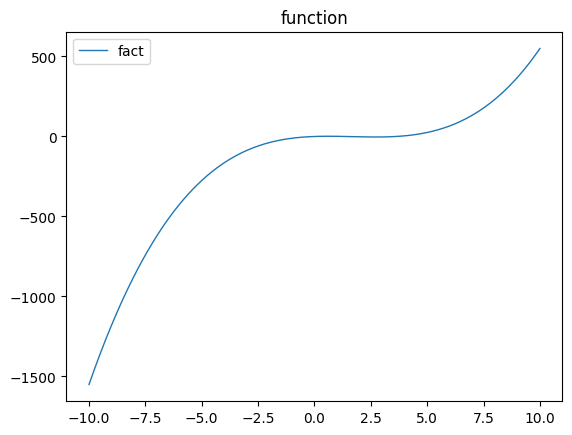

In [12]:
#  数据准备
import torch
import torch.nn as nn
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

# 生成训练数据和测试数据

x = np.linspace(-10,10,5000)
y = target_function(x)
x_train = np.expand_dims(x,axis=1)
y_train = y.reshape(5000,1)


x2 = np.linspace(-10,10,1000)
y2 = target_function(x2)
x_test = np.expand_dims(x2,axis=1)
y_test = x2.reshape(1000,-1)


# 使用批训练方式
dataset=TensorDataset(torch.tensor(x_train,dtype=torch.float),
                      torch.tensor(y_train,dtype=torch.float))
dataloader=DataLoader(dataset,batch_size=100,shuffle=True)

import matplotlib.pyplot as plt
plt.plot(x,y,label="fact",linewidth=1)
plt.title("function")
plt.legend()
plt.show()

In [8]:
class myModel(nn.Module):
    def __init__(self):
       super(myModel, self).__init__()
       self.net=nn.Sequential(
        nn.Linear(in_features=1,out_features=10),  # 输入层
        nn.ReLU(),  # 隐藏层
        nn.Linear(10,10), 
        nn.ReLU(),  # 第二个隐藏层
        nn.Linear(10,1)  # 输出层
       )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

        
mymodel = myModel()


#定义优化器和损失函数
optimizer = torch.optim.Adam(myModel.parameters(mymodel),lr=0.001)  # adam优化器
Loss=nn.MSELoss()  # MSE损失函数

In [30]:
for epoch in range(1000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=mymodel(batch_x)
        loss=Loss(y_predict,batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 每100次 的时候打印一次日志
    if (epoch+1)%100==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
        


step: 100 , loss: 33.765079498291016
step: 200 , loss: 20.0743465423584
step: 300 , loss: 31.941421508789062
step: 400 , loss: 28.796363830566406
step: 500 , loss: 33.91364288330078
step: 600 , loss: 31.783475875854492
step: 700 , loss: 18.812925338745117
step: 800 , loss: 24.989233016967773
step: 900 , loss: 32.84383773803711
step: 1000 , loss: 16.779525756835938


In [31]:
# 使用训练好的模型进行预测
predict = mymodel(torch.tensor(x_test,dtype=torch.float))

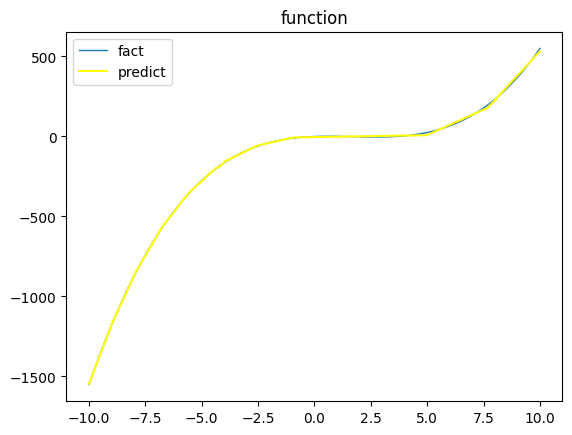

In [32]:
# 绘图展示预测的和真实数据之间的差异

import matplotlib.pyplot as plt
plt.plot(x2,y2,label="fact",linewidth=1)
plt.plot(x2,predict.detach().numpy(),label="predict",color="yellow")
plt.title("function")
plt.legend()
plt.show()